# Capture for Ximea Cameras

https://www.ximea.com/support/wiki/apis/XiAPI_Manual

In [2]:
import ximea_cam_aquire_save as aquire
import imp
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

## Bulk Collection

In [3]:
#settings:
num_frames = 10
cam_exposure = 1000
cam_gain = 20

In [6]:
imp.reload(aquire)
aquire.aquire_save_fullset(num_frames=num_frames, verbose=True, cam_exposure=cam_exposure, cam_gain=cam_gain)


Opening first camera...
Exposure is set to 1001 us = 1.001 ms
Gain is set to 20.0
Mode is set to XI_ACQ_TIMING_MODE_FREE_RUN
Framerate is set to 1000.0 fps
Data format is set to XI_RAW8
Starting data acquisition of 10 frames...**********
Effective Speed: 269.06 FPS
Stopping acquisition...
Saving data...**********Done!
Done.


()

In [3]:
import time
print(time.time())

1563578372.9896128


In [12]:
ims = []
for i in range(num_frames):
    imb = []
    with open(f'capture/data_raw_bytes_{i}.bin', 'rb') as f:
        byte = f.read(1)
        while(byte):
            byte = f.read(1)
            imb.append(int.from_bytes(byte,'big'))
        ims.append(np.array(imb).reshape((1544,2064)))
        #ims.append(np.array(imb).reshape((1544,2064)))
        #ims.append(np.array(map('|S1',list(imb))).reshape((1544,2064)))
        f.close()
for i in range(len(ims)):
    ims[i] = cv2.cvtColor(np.uint8(ims[i]), cv2.COLOR_BayerGR2RGB)
    imageio.imwrite(f'capture/img_{i}.jpg', ims[i])

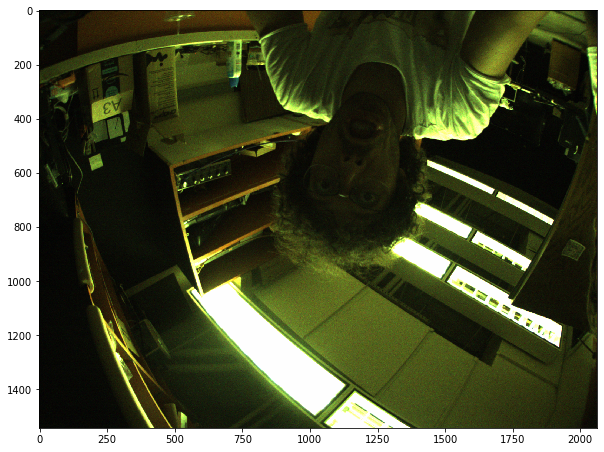

In [13]:
im = ims[0]
#im = cv2.cvtColor(np.uint8(im), cv2.COLOR_BayerGR2RGB)
plt.figure(figsize=(10,12))
plt.imshow(im)